## Its a trial to demonstrate the Quantum Tomography
Preparing Environment


In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator  # 使用新的模拟器类
from qiskit.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi
from scipy.linalg import expm
from scipy.sparse.linalg import eigsh
import numpy as np

1

* quantum state

In [3]:
# 定义量子电路
n = 3  # 量子位数
circuit = QuantumCircuit(n)

# 应用初始态（例如全为0态）

# 模拟Ising模型的相互作用
# 模拟Ising模型的相互作用
J = 1  # 相互作用强度
h = 0.5  # 外部场强度

# 使用ZZ门来模拟量子比特之间的相互作用
circuit.h(0)  # 创建叠加态
circuit.h(1)
circuit.h(2)
circuit.cz(0, 1)  # ZZ 相互作用
circuit.cz(1, 2)  # ZZ 相互作用

# 应用RX门模拟外部磁场
circuit.rx(h, 0)  # 对量子位0应用RX门，模拟外部磁场
circuit.rx(h, 1)  # 对量子位1应用RX门，模拟外部磁场
circuit.rx(h, 2)  # 对量子位2应用RX门，模拟外部磁场

# 测量
circuit.measure_all()

# 显示电路
circuit.draw()

# 显示电路
circuit.draw()

┌───┐   ┌─────────┐            ░ ┌─┐      
   q_0: ┤ H ├─■─┤ Rx(0.5) ├────────────░─┤M├──────
        ├───┤ │ └─────────┘┌─────────┐ ░ └╥┘┌─┐   
   q_1: ┤ H ├─■──────■─────┤ Rx(0.5) ├─░──╫─┤M├───
        ├───┤        │     ├─────────┤ ░  ║ └╥┘┌─┐
   q_2: ┤ H ├────────■─────┤ Rx(0.5) ├─░──╫──╫─┤M├
        └───┘              └─────────┘ ░  ║  ║ └╥┘
meas: 3/══════════════════════════════════╩══╩══╩═
                                          0  1  2

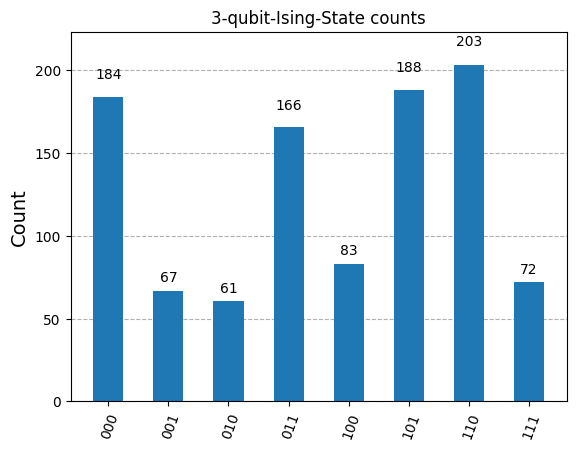

In [4]:
simulator = AerSimulator()
result = simulator.run(circuit).result()
# 获取并显示结果
counts = result.get_counts(circuit)
plot_histogram(counts, title='3-qubit-Ising-State counts')




In [5]:
# 定义 Ising 哈密顿量的函数
def ising_hamiltonian(num_qubits, J, hx, hz):
    H = np.zeros((2**num_qubits, 2**num_qubits))
    # 构建 Pauli-Z 和 Pauli-X 作用的项
    for i in range(num_qubits):
        H -= J * np.kron(np.eye(2**(i)), np.kron(np.array([[1, 0], [0, -1]]), np.eye(2**(num_qubits-i-1))))
        H -= hx * np.kron(np.eye(2**i), np.kron(np.array([[0, 1], [1, 0]]), np.eye(2**(num_qubits-i-1))))
        H -= hz * np.kron(np.eye(2**i), np.kron(np.array([[1, 0], [0, -1]]), np.eye(2**(num_qubits-i-1))))
    return H

# 模拟量子态的计算
def compute_quantum_state(num_qubits, J, hx, hz):
    H = ising_hamiltonian(num_qubits, J, hx, hz)
    # 对角化哈密顿量，得到基态
    eigenvalues, eigenvectors = eigsh(H, k=1, which='SA')
    ground_state = eigenvectors[:, 0]
    return ground_state

# 计算测量概率分布
def compute_measurement_probabilities(state, num_measure_qubits):
    probabilities = []
    for i in range(2**num_measure_qubits):
        prob = np.abs(state[i])**2
        probabilities.append(prob)
    return probabilities

# 生成模拟数据
num_qubits = 9
num_measure_qubits = 3
J = 1.0
hx = 0.5
hz = 0.2

state = compute_quantum_state(num_qubits, J, hx, hz)
probs = compute_measurement_probabilities(state, num_measure_qubits)
density_matrix = np.outer(state, np.conj(state))  # 计算 |psi⟩⟨psi|
# 保存为 .npy 文件
print(density_matrix)
np.save('quantum_state_probs.npy', probs)

[[7.02586736e-01 1.40517347e-01 1.40517347e-01 ... 1.79862204e-06
  1.79862204e-06 3.59724408e-07]
 [1.40517347e-01 2.81034694e-02 2.81034694e-02 ... 3.59724409e-07
  3.59724409e-07 7.19448817e-08]
 [1.40517347e-01 2.81034694e-02 2.81034694e-02 ... 3.59724409e-07
  3.59724409e-07 7.19448817e-08]
 ...
 [1.79862204e-06 3.59724409e-07 3.59724409e-07 ... 4.60447243e-12
  4.60447243e-12 9.20894486e-13]
 [1.79862204e-06 3.59724409e-07 3.59724409e-07 ... 4.60447243e-12
  4.60447243e-12 9.20894486e-13]
 [3.59724408e-07 7.19448817e-08 7.19448817e-08 ... 9.20894486e-13
  9.20894486e-13 1.84178897e-13]]


## 混态哈密顿量构建
直接生成，无任何物理约束

In [6]:
def random_density_matrix(dim):
    random_matrix = np.random.rand(dim, dim) + 1j * np.random.rand(dim, dim)
    rho = random_matrix @ random_matrix.conj().T  # 确保正定
    rho /= np.trace(rho)  # 归一化
    return rho

dim = 2**num_qubits
rho_random = random_density_matrix(dim)
print("Random Density Matrix:\n", rho_random)

Random Density Matrix:
 [[0.00188676-1.50970749e-21j 0.00139519+1.67504939e-05j
  0.00144329-3.91568160e-05j ... 0.0014636 -4.04613002e-05j
  0.0014117 +2.75375669e-07j 0.00140296-1.78588062e-05j]
 [0.00139519-1.67504939e-05j 0.00192876+1.56667937e-21j
  0.00145295-6.60171006e-05j ... 0.00143993-3.43285894e-05j
  0.00146653+4.59107970e-06j 0.0014183 -2.33053777e-05j]
 [0.00144329+3.91568160e-05j 0.00145295+6.60171006e-05j
  0.00195179-2.96212526e-21j ... 0.00148588+1.34788269e-05j
  0.00149689+5.77334921e-05j 0.00143796+2.61412761e-05j]
 ...
 [0.0014636 +4.04613002e-05j 0.00143993+3.43285894e-05j
  0.00148588-1.34788269e-05j ... 0.0019504 -4.58354620e-23j
  0.00145704+6.11222499e-05j 0.00141523+1.37286033e-05j]
 [0.0014117 -2.75375669e-07j 0.00146653-4.59107970e-06j
  0.00149689-5.77334921e-05j ... 0.00145704-6.11222499e-05j
  0.00197729-4.64673045e-23j 0.00142534-3.92900066e-05j]
 [0.00140296+1.78588062e-05j 0.0014183 +2.33053777e-05j
  0.00143796-2.61412761e-05j ... 0.00141523-1.3728

图网络实验

In [7]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data


In [8]:
# 1. 构造 9 节点完全图
num_nodes = 9

# 构造完全图的边索引（edge_index）
edge_index = torch.combinations(torch.arange(num_nodes), r=2).T  # 所有节点两两组合
edge_index = torch.cat([edge_index, edge_index.flip(0)], dim=1)  # 无向图，添加反向边

# 节点特征：每个节点用一个简单的 2 维向量表示
x = torch.rand((num_nodes, 2))  # 随机初始化节点特征

# 节点标签：用于分类（假设 2 类，标签为 0 或 1）
y = torch.randint(0, 2, (num_nodes,))

# 构造图数据
data = Data(x=x, edge_index=edge_index, y=y)

# 2. 定义简单的 GNN 模型
class SimpleGNN(torch.nn.Module):
    def __init__(self):
        super(SimpleGNN, self).__init__()
        self.conv1 = GCNConv(in_channels=2, out_channels=4)
        self.conv2 = GCNConv(in_channels=4, out_channels=2)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# 3. 模型训练
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleGNN().to(device)
data = data.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(50):
    model.train()
    optimizer.zero_grad()
    out = model(data)  # 前向传播
    loss = F.nll_loss(out, data.y)  # 交叉熵损失
    loss.backward()  # 反向传播
    optimizer.step()  # 更新参数

    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch + 1}, Loss: {loss.item():.4f}')

# 4. 测试模型
model.eval()
_, pred = model(data).max(dim=1)  # 获取预测类别
accuracy = (pred == data.y).sum().item() / data.y.size(0)
print(f'Accuracy: {accuracy:.4f}')

Epoch 10, Loss: 0.6871
Epoch 20, Loss: 0.6870
Epoch 30, Loss: 0.6870
Epoch 40, Loss: 0.6870
Epoch 50, Loss: 0.6870
Accuracy: 0.5556


In [9]:
import numpy as np
import torch
from torch_geometric.data import Data

# 定义 Ising 哈密顿量的函数
def ising_hamiltonian(num_qubits, J, hx, hz):
    H = np.zeros((2**num_qubits, 2**num_qubits))
    for i in range(num_qubits):
        H -= J * np.kron(np.eye(2**(i)), np.kron(np.array([[1, 0], [0, -1]]), np.eye(2**(num_qubits-i-1))))
        H -= hx * np.kron(np.eye(2**i), np.kron(np.array([[0, 1], [1, 0]]), np.eye(2**(num_qubits-i-1))))
        H -= hz * np.kron(np.eye(2**i), np.kron(np.array([[1, 0], [0, -1]]), np.eye(2**(num_qubits-i-1))))
    return H

def compute_quantum_state(num_qubits, J, hx, hz):
    from scipy.sparse.linalg import eigsh
    H = ising_hamiltonian(num_qubits, J, hx, hz)
    eigenvalues, eigenvectors = eigsh(H, k=1, which='SA')
    ground_state = eigenvectors[:, 0]
    return ground_state

def generate_graph_data(num_qubits, J, hx, hz):
    state = compute_quantum_state(num_qubits, J, hx, hz)
    density_matrix = np.outer(state, np.conj(state))  # |psi⟩⟨psi|
    measurement_probs = np.abs(np.diag(density_matrix))  # 对角元素作为测量概率

    # 构造图
    edge_index = torch.combinations(torch.arange(num_qubits), r=2).T  # 全连接边
    node_features = torch.tensor(
        [[hx, hz, measurement_probs[i]] for i in range(num_qubits)],  # 修正括号匹配
        dtype=torch.float
    )  # 节点特征：hx, hz, 测量概率
    edge_weights = torch.full((edge_index.size(1),), J, dtype=torch.float)  # 边特征：J

    # 返回图数据
    return Data(x=node_features, edge_index=edge_index, edge_attr=edge_weights)

# 示例：生成 9 个量子比特的图数据
num_qubits = 9
J = 1.0
hx = 0.5
hz = 0.2
graph_data = generate_graph_data(num_qubits, J, hx, hz)

print("Graph Data:")
print(graph_data)

import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

# 定义 GNN 模型
class QuantumGNN(torch.nn.Module):
    def __init__(self):
        super(QuantumGNN, self).__init__()
        self.conv1 = GCNConv(in_channels=3, out_channels=6)  # 输入特征维度 3（hx, hz, prob）
        self.conv2 = GCNConv(in_channels=6, out_channels=2)  # 输出类别 2（假设分类任务）

    def forward(self, data):
        x, edge_index, edge_attr = data.x, data.edge_index, data.edge_attr
        x = self.conv1(x, edge_index, edge_weight=edge_attr)
        x = F.relu(x)
        x = self.conv2(x, edge_index, edge_weight=edge_attr)
        return F.log_softmax(x, dim=1)

# 训练示例
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = QuantumGNN().to(device)
data = graph_data.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(50):
    model.train()
    optimizer.zero_grad()
    out = model(data)  # 前向传播
    # 假设标签随机生成（根据实际任务定义标签）
    y = torch.randint(0, 2, (num_qubits,), device=device)
    loss = F.nll_loss(out, y)  # 交叉熵损失
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch + 1}, Loss: {loss.item():.4f}')


Graph Data:
Data(x=[9, 3], edge_index=[2, 36], edge_attr=[36])
Epoch 10, Loss: 0.7441
Epoch 20, Loss: 0.7092
Epoch 30, Loss: 0.6992
Epoch 40, Loss: 0.6765
Epoch 50, Loss: 0.6467


In [10]:
# 对于 Ising 模型计算能量
def compute_energy(state, J, hx, hz):
    energy = 0
    for i in range(len(state)):
        for j in range(i+1, len(state)):
            energy += -J * state[i] * state[j]  # 自旋耦合项
        energy += -hx * state[i]  # Pauli-X项
        energy += -hz * state[i]  # Pauli-Z项
    return energy
